In [ ]:
import pandas as pd
import plotly.express as px
import streamlit as st
import matplotlib as plt

In [ ]:
vehicles = pd.read_csv(r"C:\Users\shaly\.vscode\Car-Sales\vehicles_us.csv")

In [128]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [129]:
vehicles.sample(20)

price  model_year                         model  condition  cylinders  \
3031   11800      1986.0           chevrolet silverado       good        8.0   
48177  17900      2017.0                  ford mustang  excellent        4.0   
40693   9250      2012.0              chevrolet camaro  excellent        6.0   
32491   7995      2005.0      chevrolet silverado 1500       good        8.0   
27962  15500      2005.0                      ram 2500  excellent        6.0   
1785   16000      2011.0                    ford f-150   like new        NaN   
15441  23900      2017.0  chevrolet camaro lt coupe 2d       good        6.0   
6454    4500      2004.0                 toyota sienna       good        6.0   
2642    4400      2009.0                  toyota prius       good        4.0   
43561   5650      2006.0         chevrolet trailblazer  excellent        6.0   
19771   8995      2010.0               nissan frontier       good        6.0   
3719   11995      2013.0       chrysler town & country       good        6.0   
43936   2600         NaN              volkswagen jetta       good        4.0   
25895   6995      2016.0               chevrolet cruze       good        4.0   
23569   7877      2011.0                    honda cr-v       good        4.0   
46156   9000      2010.0                subaru outback       good        4.0   
13798   8895      2006.0             toyota highlander  excellent        6.0   
38234  18500      2013.0                      ram 1500  excellent        8.0   
23362      1         NaN                  nissan rogue  excellent       10.0   
50747  11450      2004.0                 jeep wrangler   like new        6.0   

         fuel  odometer transmission         type paint_color  is_4wd  \
3031      gas   71000.0    automatic       pickup        grey     1.0   
48177     gas   70418.0    automatic        coupe         red     NaN   
40693     gas  110000.0    automatic  convertible      orange     NaN   
32491     gas  141525.0    automatic        truck        grey     NaN   
27962  diesel  187000.0    automatic        truck       white     1.0   
1785      gas  122000.0    automatic       pickup       brown     1.0   
15441     gas       NaN        other        coupe       white     NaN   
6454      gas  179800.0    automatic     mini-van        grey     NaN   
2642      gas  173660.0    automatic        sedan        grey     NaN   
43561     gas  118895.0    automatic          SUV         NaN     NaN   
19771     gas  144381.0       manual        truck         NaN     1.0   
3719      gas       NaN    automatic     mini-van       brown     NaN   
43936     gas  164635.0       manual        sedan       white     NaN   
25895     gas  111716.0    automatic        sedan      silver     NaN   
23569     gas  173901.0    automatic          SUV         NaN     NaN   
46156     gas  145273.0    automatic    hatchback         NaN     1.0   
13798     gas  103000.0    automatic          SUV         NaN     NaN   
38234     gas   62007.0    automatic        truck        grey     1.0   
23362     gas    6952.0        other          SUV        blue     1.0   
50747     gas  112723.0       manual      offroad         red     1.0   

      date_posted  days_listed  
3031   2018-06-14           42  
48177  2018-06-10           45  
40693  2018-08-12           31  
32491  2018-08-19           10  
27962  2018-12-22           60  
1785   2018-10-05            9  
15441  2019-01-07           57  
6454   2018-11-11           38  
2642   2018-08-24           19  
43561  2018-07-12           24  
19771  2018-06-29            8  
3719   2018-05-30           33  
43936  2018-06-05           26  
25895  2019-03-20           84  
23569  2018-10-23           62  
46156  2019-03-04           52  
13798  2019-02-20           15  
38234  2018-06-06            5  
23362  2018-11-05           27  
50747  2018-10-11           16

In [130]:
#check for duplicates
vehicles.duplicated().sum()

0

In [131]:
#change model year column to object type
vehicles['model_year'] = vehicles['model_year'].astype('object')
#change is_4wd column to object type
vehicles['is_4wd'] = vehicles['is_4wd'].astype('object')
#change date posted column to datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

In [132]:
#check data types to make verify change
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  object        
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  object        
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [133]:
#vehicles that are 4 wheel drive represented by 1 and vehicles that are not represented by 0
vehicles['is_4wd'] = vehicles['is_4wd'].fillna('0')

In [134]:
#verify is_4wd column values changed
vehicles.head()

price model_year           model  condition  cylinders fuel  odometer  \
0   9400     2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500        NaN      ford f-150       good        6.0  gas   88705.0   
2   5500     2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500     2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900     2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color is_4wd date_posted  days_listed  
0    automatic     SUV         NaN    1.0  2018-06-23           19  
1    automatic  pickup       white    1.0  2018-10-19           50  
2    automatic   sedan         red      0  2019-02-07           79  
3    automatic  pickup         NaN      0  2019-03-22            9  
4    automatic   sedan       black      0  2019-04-02           28

In [135]:
vehicles.describe()

price     cylinders       odometer  \
count   51525.000000  46265.000000   43633.000000   
mean    12132.464920      6.125235  115553.461738   
min         1.000000      3.000000       0.000000   
25%      5000.000000      4.000000   70000.000000   
50%      9000.000000      6.000000  113000.000000   
75%     16839.000000      8.000000  155000.000000   
max    375000.000000     12.000000  990000.000000   
std     10040.803015      1.660360   65094.611341   

                         date_posted  days_listed  
count                          51525  51525.00000  
mean   2018-10-25 01:57:46.270742528     39.55476  
min              2018-05-01 00:00:00      0.00000  
25%              2018-07-29 00:00:00     19.00000  
50%              2018-10-25 00:00:00     33.00000  
75%              2019-01-21 00:00:00     53.00000  
max              2019-04-19 00:00:00    271.00000  
std                              NaN     28.20427

In [136]:
#create histogram to show typical cost of listed vehicles
fig = px.histogram(vehicles, x='odometer')

fig.update_layout(
    xaxis_range=[0, 500000],
    xaxis_title='Mileage'
)

fig.show()

The histogram plotted above gives us an idea of the typical cost of a used vehicle which is around 100k.

In [138]:
#create histogram to show typical year of vehicles listed 
fig = px.histogram(vehicles, x='model_year')

fig.update_layout(
    xaxis_range=[1950, 2025],
    yaxis_range=[0,5000],
    xaxis_title='Year of Vehicle',
    bargap=0.2
)

fig.show()

The histogram above displays the amount of vehicles listed based off the year it was made. It's a steady rise until it gets to around 2013, and then it's a steady drop. The exception to this statement is 2009 and 2020 which dropped comparatively low.

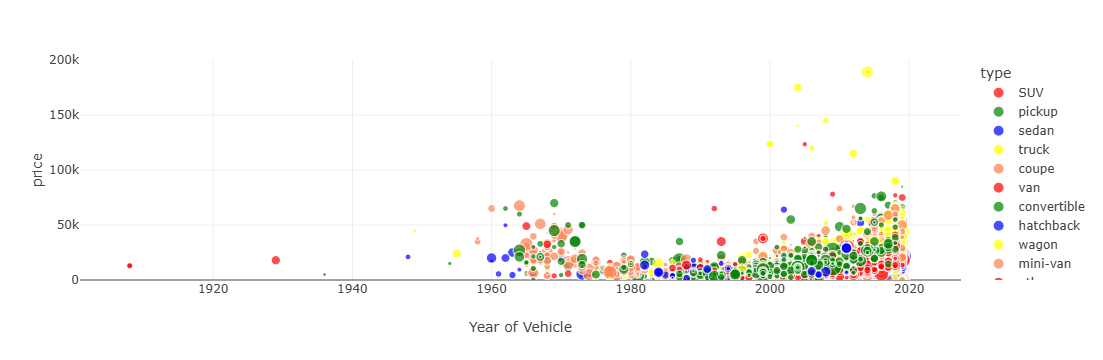

In [140]:
#create scatter plot 
custom_colors = ['red', 'green', 'blue', 'yellow', 'coral']
fig = px.scatter(vehicles, x ='model_year', y='price', color='type', color_discrete_sequence=custom_colors, size='days_listed')

fig.update_layout(xaxis_title='Year of Vehicle',
                  yaxis_range=[0,200000]
)
fig.show()

The scatter plot shows us how much people list vehicles based on the year and type of the vehicle. It starts off high with a dip in the middle and goes back up. One could make a conclusion that cars considered antique and newer cars tend to be sold at a higher price than the everyday car based on the image.

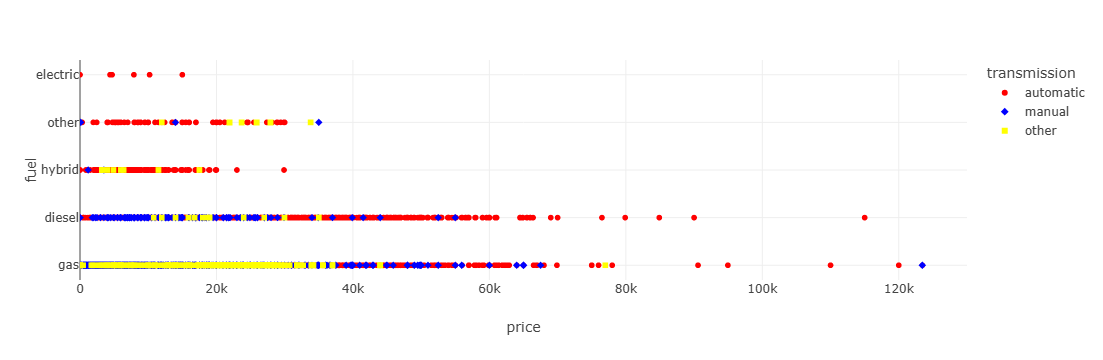

In [151]:
custom_colors = ['red', 'blue', 'yellow']
fig = px.scatter(vehicles, y='fuel', x='price', color='transmission', symbol='transmission', color_discrete_sequence=custom_colors)
fig.update_layout(xaxis_range=[0,130000])
fig.show()

The scatter plot above categorizes listed vehicles by fuel types, transmission, and price. A majority of the cars listed as gas fuel and other transmission additionally